# Module 1 Exercises 

The exercises in this notebook will ask you to plot simple graphs showing the linear relationships between different set of variables. The dataset used in the notebook is about Nutrition data of different food items. There are some of the variables in the dataset which have linear relationships between them.

Read the data from USDA dataset in `"/dsa/data/all_datasets/USDA.csv"` into the dataframe called _USDA_ . 

In [1]:
import pandas
import csv
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
USDA = pandas.read_csv("/dsa/data/all_datasets/USDA.csv", sep=',', delimiter=None)

In [2]:
type(USDA)

pandas.core.frame.DataFrame

In [3]:
USDA.head()

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [4]:
USDA = USDA.fillna(method='pad')

In [5]:
USDA.shape

(7058, 16)

In [6]:
USDA.describe

<bound method NDFrame.describe of          ID                 Description  Calories  Protein  TotalFat  \
0      1001            BUTTER,WITH SALT     717.0     0.85     81.11   
1      1002    BUTTER,WHIPPED,WITH SALT     717.0     0.85     81.11   
2      1003        BUTTER OIL,ANHYDROUS     876.0     0.28     99.48   
3      1004                 CHEESE,BLUE     353.0    21.40     28.74   
4      1005                CHEESE,BRICK     371.0    23.24     29.68   
...     ...                         ...       ...      ...       ...   
7053  80200               FROG LEGS,RAW      73.0    16.40      0.30   
7054  83110             MACKEREL,SALTED     305.0    18.50     25.10   
7055  90240  SCALLOP,(BAY&SEA),CKD,STMD     111.0    20.54      0.84   
7056  90560                   SNAIL,RAW      90.0    16.10      1.40   
7057  93600            TURTLE,GREEN,RAW      89.0    19.80      0.50   

      Carbohydrate  Sodium  SaturatedFat  Cholesterol  Sugar  Calcium  Iron  \
0             0.06   7

In [7]:
from sklearn import linear_model

In [8]:
USDA[["SaturatedFat","TotalFat"]].head()

,SaturatedFat,TotalFat
0,51.368,81.11
1,50.489,81.11
2,61.924,99.48
3,18.669,28.74
4,18.764,29.68


**Activity 1:** Fit a linear regression model to predict TotalFat using SaturatedFat.

In [13]:
# Your code for activity 1 goes here..

# use linear_model

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(USDA["SaturatedFat"]).reshape((-1, 1))
y = np.array(USDA["TotalFat"])

model = LinearRegression()

model.fit(x, y)

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)
print('slope:', model.coef_)

y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

# or a slight variation of code gave me different outputs of intercept and slope
print('--------')

X = np.array(USDA["SaturatedFat"]).reshape((-1, 1))
y = np.array(USDA["TotalFat"])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.intercept_)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


coefficient of determination: 0.5682419911030793
intercept: 4.049148903940884
slope: [1.85720478]
predicted response:
[ 99.4500441   97.81756109 119.05469777 ...   4.45401955   4.71959983
   4.28501391]
--------
4.028787854847718
[1.86967019]


,Actual,Predicted
0,0.13,4.071790
1,0.18,4.075530
2,0.22,4.083008
3,2.53,6.350918
4,0.22,4.118532
...,...,...
1407,19.87,16.815462
1408,0.04,4.028788
1409,0.30,4.170883
1410,0.14,4.096096


**Activity 2:** Draw a scatter plot between TotalFat and SaturatedFat and fit a linear regression line predicting TotalFat using SaturatedFat.

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


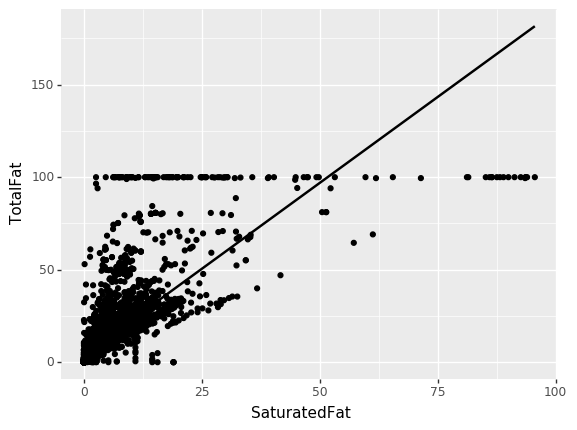

<ggplot: (8749264210454)>

In [11]:
# Your code for activity 2 goes here..

# Plot outputs
p1 = ggplot(USDA,aes(x="SaturatedFat", y="TotalFat"))
p1 = p1 + geom_point()
p1 = p1 + stat_smooth(method= 'lm', se=False) + expand_limits(x=4, y=4)
p1
